In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("data.csv")
print(df.shape)
print()
#There are many attributes, but the data has very few elements.

#Check for missing or incorrect values(according to metadata)
for column in df:
    print(column+":", df[column].unique())
#There are no missing or incorrect values

(395, 31)

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
passed: ['no' 'yes']


In [53]:
#Non-numeric values to numeric values

#1_Binary attributes
asymmetric_binary_attributes = ['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','passed']
for column in asymmetric_binary_attributes:
    df[column] = df[column].replace(['no','yes'],[0,1])

#2_Creating dummy variables for nominal attributes
df = pd.get_dummies(df,drop_first=True)

#Print unique values to see changes
for column in df:
    print(column+":", df[column].unique())
print()
print(df.shape)

age: [18 17 15 16 19 22 20 21]
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: [1 0]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [1 0]
higher: [1 0]
internet: [0 1]
romantic: [0 1]
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
passed: [0 1]
school_MS: [0 1]
sex_M: [0 1]
address_U: [1 0]
famsize_LE3: [0 1]
Pstatus_T: [0 1]
Mjob_health: [0 1]
Mjob_other: [0 1]
Mjob_services: [0 1]
Mjob_teacher: [0 1]
Fjob_health: [0 1]
Fjob_other: [0 1]
Fjob_services: [0 1]
Fjob_teacher: [1 0]
reason_home: [0 1]
reason_other: [0 1]
reason_reputation: [0 1]
guardian_mother: [1 0]
guardian_other: [0 1]

(395, 40)


<AxesSubplot:xlabel='passed', ylabel='count'>

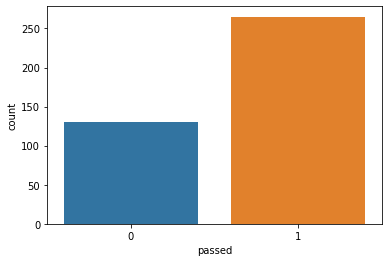

In [54]:
#Distribution of the target
sns.countplot(x='passed', data=df)

<AxesSubplot:>

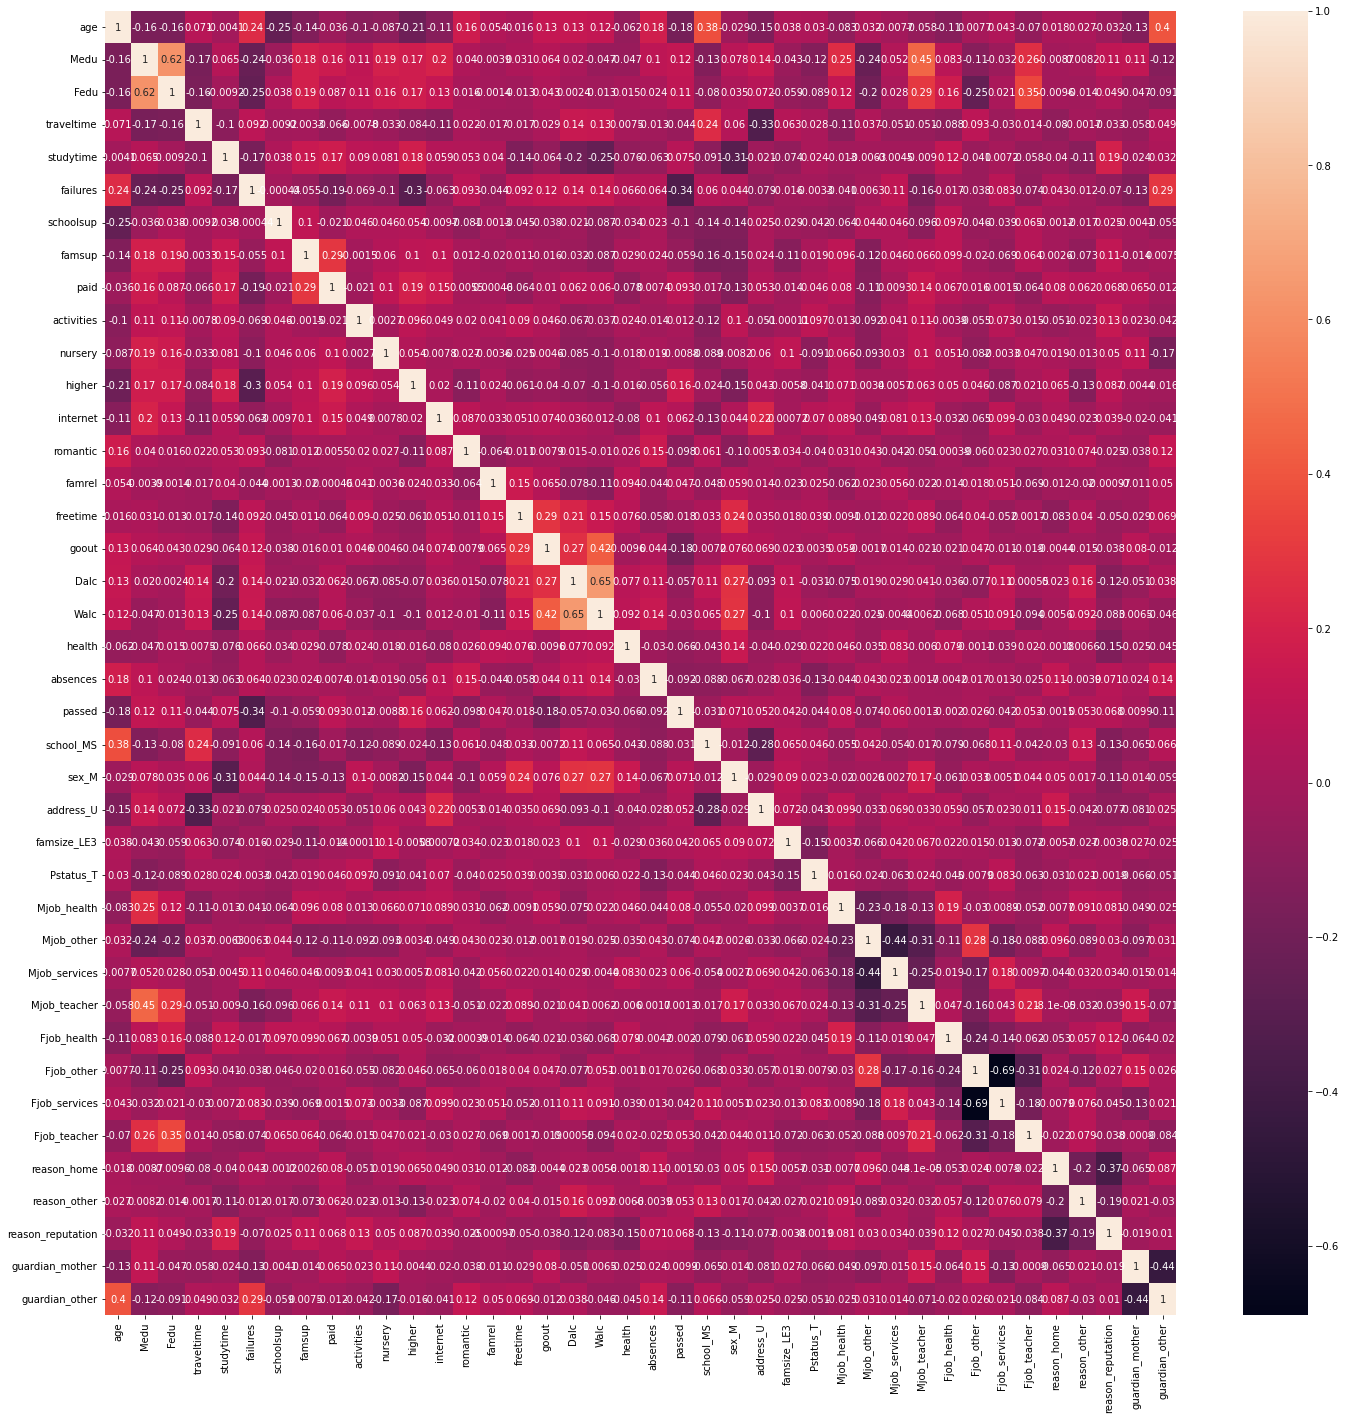

In [55]:
#Correlation heatmap for all attributes
fig, ax = plt.subplots(figsize=(24, 24))
corr = df.corr()
sns.heatmap(corr, annot=True)
# There are positive correlations between:
# 'Medu'-'Mjob_teacher'
# 'Medu'-'Fedu'
# 'age'-'guardian_other'
# 'Walc'-'goout'
# There are more weak positive correlations.

# The negative correlations between two dummy variables which are derived from the same categorical variable are not important.
# There are more weak negative correlations.

<AxesSubplot:xlabel='failures', ylabel='count'>

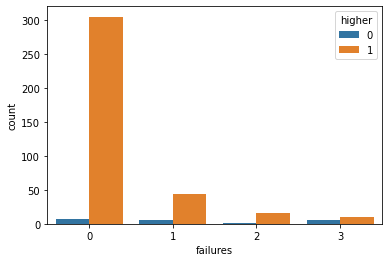

In [56]:
sns.countplot(x='failures', hue='higher', data=df)
#It seems failures and higher are negatively correlated.
#That means the ones who want to take higher education have less past class failures.

<AxesSubplot:xlabel='sex_M', ylabel='count'>

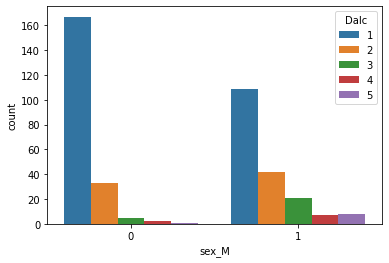

In [57]:
sns.countplot(x='sex_M', hue='Dalc', data=df)
#It seems male students have more workday alcohol consumption than female students. (For Dalc>1)

<AxesSubplot:xlabel='goout', ylabel='count'>

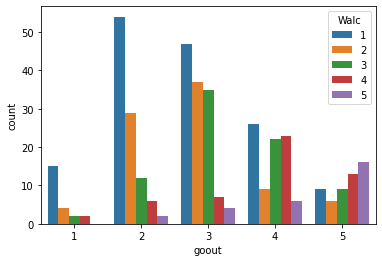

In [58]:
sns.countplot(x='goout', hue='Walc', data=df)
#It seems students who go out more have more weekend alcohol consumption. (For Walc>2)

In [59]:
#Shuffle with permutation
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(drop=True, inplace=True)

#Split predictors and target
X = df.drop('passed',axis=1).values
y = df['passed'].values

#Split train and test sets with masking
train_ratio = 7/10
trainMask = [True]*round(len(df)*train_ratio)+[False]*(len(df)-round(len(df)*train_ratio))
train = df[trainMask]
test = df[~np.array(trainMask)]

#Split predictors and target
X_train = train.drop('passed',axis=1).values
X_test = test.drop('passed',axis=1).values
y_train = train['passed'].values
y_test = test['passed'].values

#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#Logistic Regression Implementation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Calculating accuracy over the test set
from sklearn.metrics import accuracy_score
pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, pred)
print(f"Accuracy over the test set: {lr_accuracy}")

#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X, y, cv=10)
lr_accuracy_cv = np.mean(cv_scores)
print(f"Accuracy from cross validation: {lr_accuracy_cv}")

Accuracy over the test set: 0.6722689075630253
Accuracy from cross validation: 0.6913461538461538


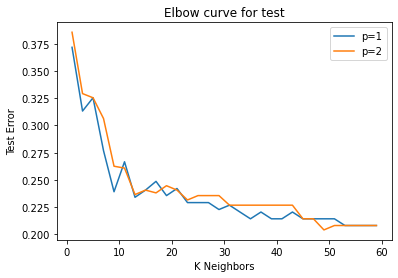

Minimum test error: 0.20408163265306123 (p=2 and k=49)
Test F1 Score: 0.7959183673469388
Accuracy from cross validation: 0.6682692307692308
Accuracy over the test set: 0.6638655462184874


In [61]:
#kNN Classifier Implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
#Since it is a classification, k values should be odd.
k_values = range(1,60,2)
test_errors_p1 = []
test_errors_p2 = []

#Testing k_values
for k in k_values:
    #Test for p=1
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    test_errors_p1.append(1-f1_score(pred, y_test))

    #Test for p=2
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    test_errors_p2.append(1-f1_score(pred, y_test))

#Plotting elbow curve
fig, ax = plt.subplots()
ax.plot(k_values, test_errors_p1, label="p=1")
ax.plot(k_values, test_errors_p2, label="p=2")
ax.legend()
ax.set_ylabel('Test Error')
ax.set_xlabel('K Neighbors')
plt.title("Elbow curve for test")
plt.show()

#Choosing the best model
#Choosing the best k with the list indexes
min_test_error_p1 = min(test_errors_p1)
min_test_error_p2 = min(test_errors_p2)
if(min_test_error_p1 < min_test_error_p2):
    p=1
    min_test_error = min_test_error_p1
    best_k = test_errors_p1.index(min_test_error)*2+1
else:
    p=2
    min_test_error = min_test_error_p2
    best_k = test_errors_p2.index(min_test_error)*2+1
print(f"Minimum test error: {min_test_error} (p={p} and k={best_k})")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

#F1 score
pred = knn.predict(X_test)
knn_f1_score = f1_score(pred, y_test)
print("Test F1 Score:", knn_f1_score)

#Cross validation
cv_scores = cross_val_score(knn, X, y, cv=10)
knn_accuracy_cv = np.mean(cv_scores)
print(f"Accuracy from cross validation: {knn_accuracy_cv}")

#Calculating accuracy over the test set
pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, pred)
print(f"Accuracy over the test set: {knn_accuracy}")

In [62]:
accuracies = pd.DataFrame([["Logistic Regression",lr_accuracy],["kNN Classification",knn_accuracy]],columns=["Model","Accuracy"])
accuracies
#There is no major difference between logistic regression and kNN classification.
#Logistic regression has more accuracy for this split(run), but this situation changes for other splits(runs).
#Better models with more accuracies can be used for this data.

,Model,Accuracy
0,Logistic Regression,0.672269
1,kNN Classification,0.663866


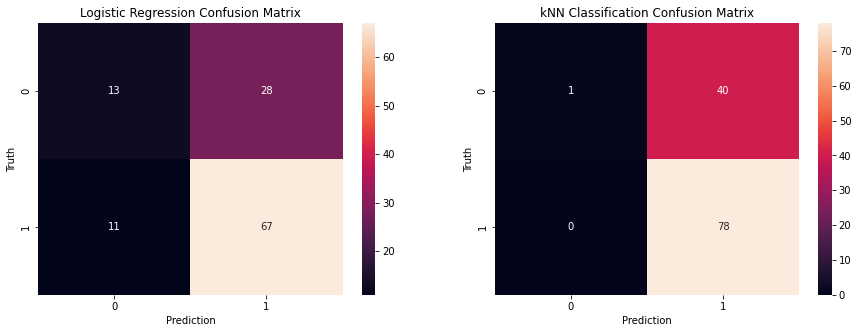

Logistic Regression
Accuracy: 0.6722689075630253
Error rate: 0.3277310924369748
Precision: 0.7052631578947368
Recall(True Positive Rate): 0.8589743589743589
False Positive Rate: 0.6829268292682927
-----------------------------------
kNN Classification
Accuracy: 0.6638655462184874
Error rate: 0.33613445378151263
Precision: 0.6610169491525424
Recall(True Positive Rate): 1.0
False Positive Rate: 0.975609756097561


In [63]:
from sklearn.metrics import confusion_matrix

#Confusion matrix for logistic regression
lr_cm = confusion_matrix(y_test, lr.predict(X_test))
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(lr_cm, annot=True, fmt='g', ax=ax[0])
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Truth')
ax[0].set_title('Logistic Regression Confusion Matrix')

#Confusion matrix for kNN Classification
knn_cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(knn_cm, annot=True, fmt='g', ax=ax[1])
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Truth')
ax[1].set_title('kNN Classification Confusion Matrix')
plt.show()

#Results
print("Logistic Regression")
TP = lr_cm[1][1]
TN = lr_cm[0][0]
FN = lr_cm[1][0]
FP = lr_cm[0][1]
n = TP + TN + FN + FP
print("Accuracy:", (TP+TN)/n)
print("Error rate:", (FP+FN)/n)
print("Precision:", (TP/(TP+FP)))
print("Recall(True Positive Rate):", (TP/(TP+FN)))
print("False Positive Rate:", (FP/(FP+TN)))
print("-----------------------------------")
print("kNN Classification")
TP = knn_cm[1][1]
TN = knn_cm[0][0]
FN = knn_cm[1][0]
FP = knn_cm[0][1]
print("Accuracy:", (TP+TN)/n)
print("Error rate:", (FP+FN)/n)
print("Precision:", (TP/(TP+FP)))
print("Recall(True Positive Rate):", (TP/(TP+FN)))
print("False Positive Rate:", (FP/(FP+TN)))

#Recall and false positive rate for kNN classification is usually higher than logistic regression.
#Precision for logistic regression is usually higher than kNN classification's precision.

#Recall and false positive rate are high for kNN classification because as it can be seen from the confusion matrix
#kNN classification is unlikely to predict 0 for the target.
#Precision is higher for logistic regression because it makes less mistake at predicting 1 for the target.

#For accuracy and error rate, result is changing for each split(run).

#Basicly kNN classification is almost predicting every test data as 1.
#Logistic regression predicts 0 more than kNN classification but it is bad at doing it.
#Since data is small and target's 0 values is half of the 1 values, both model are bad at predicting 0 for the target.

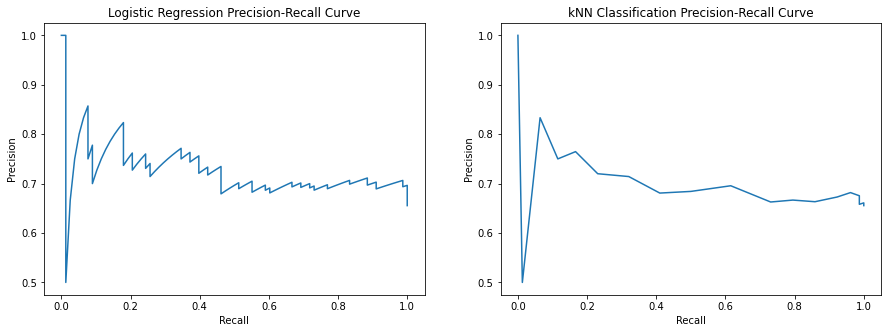

In [64]:
from sklearn.metrics import precision_recall_curve

#Precision-recall curve for logistic regression
y_score = lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(recall, precision)
ax[0].set_title('Logistic Regression Precision-Recall Curve')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')

#Precision-recall curve for logistic regression
y_score = knn.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

ax[1].plot(recall, precision)
ax[1].set_title('kNN Classification Precision-Recall Curve')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

# There is no big difference between two model's precision recall curve and it is changing for each split(run).
# There is also no big difference between two model's accuracies.
# Evalualtion metrics and precision-recall graphs considered, these two model are not good enough for this data.